In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import (gamma, kv)

In [2]:
df = pd.read_csv("output_old/csv/sp500_stock_names.csv")
df.head()

,Unnamed: 0,date,WHR,MAR,HD,AZO,GPC,TJX,DRI,TGT,...,FE,D,AEE,ED,DUK,CMS,AES,CNP,PPL,EIX
0,0,1999-12-31,36.483448,11.951112,43.704758,32.3125,11.794188,1.968308,6.568381,24.178312,...,8.151894,7.874141,11.411933,11.974446,15.292458,15.532209,27.710835,6.736605,4.003064,13.493931
1,1,2000-01-03,34.661022,11.548796,41.440063,30.5625,11.437691,1.956269,6.273940,23.725620,...,7.927324,7.648447,11.259479,11.714136,14.720421,14.691791,26.876743,6.552540,3.882753,13.048775
2,2,2000-01-04,33.329239,11.477802,39.254829,30.4375,11.318857,1.853941,6.228640,22.696753,...,7.927324,7.836525,11.259479,11.865987,14.949243,14.878547,25.810934,6.626164,3.981191,13.178934
3,3,2000-01-05,33.819897,11.667130,40.049461,30.3125,11.259440,1.799767,6.455132,22.182318,...,8.219263,8.049676,11.695045,12.408306,15.559418,15.283185,26.088968,6.902254,4.068688,14.024991
4,4,2000-01-06,34.100269,11.832785,38.142330,29.0625,11.259440,1.908116,6.387187,21.132877,...,8.241718,8.137450,11.651489,12.429995,15.978907,15.158688,26.297491,6.939069,4.014003,13.992451


In [3]:
r = df.iloc[:, 2:]
r = np.asarray(r)
print(r.shape)

(5640, 199)


## Volatality

In [4]:
aapl = df.loc[:,['date','AAPL']]
aapl.head()

,date,AAPL
0,1999-12-31,0.783791
1,2000-01-03,0.853356
2,2000-01-04,0.781409
3,2000-01-05,0.792843
4,2000-01-06,0.724232


In [5]:
aapl['returns'] = aapl.AAPL.pct_change()
aapl.head()

,date,AAPL,returns
0,1999-12-31,0.783791,NaN
1,2000-01-03,0.853356,0.088754
2,2000-01-04,0.781409,-0.084310
3,2000-01-05,0.792843,0.014633
4,2000-01-06,0.724232,-0.086538


In [6]:
aapl['std'] = aapl.returns.rolling(window=60, min_periods=1).std()

In [7]:
aapl.head()

,date,AAPL,returns,std
0,1999-12-31,0.783791,NaN,NaN
1,2000-01-03,0.853356,0.088754,NaN
2,2000-01-04,0.781409,-0.084310,0.122375
3,2000-01-05,0.792843,0.014633,0.086828
4,2000-01-06,0.724232,-0.086538,0.084756


In [8]:
aapl = aapl.iloc[2:,:]

In [9]:
aapl.tail()

,date,AAPL,returns,std
5635,2022-05-24,140.165298,-0.019216,0.024343
5636,2022-05-25,140.325089,0.001140,0.024316
5637,2022-05-26,143.580551,0.023199,0.024360
5638,2022-05-27,149.432434,0.040757,0.024981
5639,2022-05-31,148.633545,-0.005346,0.024887


In [10]:
pos = {}
aapl.index = np.arange(len(aapl))
for i in aapl.index:
    if aapl.date[i][:4] not in pos:
        pos[aapl.date[i][:4]] = i

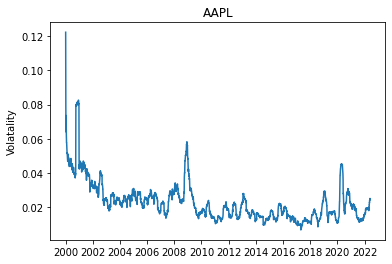

In [11]:
plt.plot(aapl.date,aapl['std'])
plt.xticks(ticks = list(pos.values())[::2],labels=list(pos.keys())[::2])
plt.ylabel("Volatality")
plt.title('AAPL')
plt.show()

## Correlation matrix

In [12]:
data = pd.read_csv("output_old/csv/sp500_sector_names.csv")
data.head()

,Unnamed: 0,date,CD,CD.1,CD.2,CD.3,CD.4,CD.5,CD.6,CD.7,...,UT.11,UT.12,UT.13,UT.14,UT.15,UT.16,UT.17,UT.18,UT.19,UT.20
0,0,1999-12-31,36.483448,11.951112,43.704758,32.3125,11.794188,1.968308,6.568381,24.178312,...,8.151894,7.874141,11.411933,11.974446,15.292458,15.532209,27.710835,6.736605,4.003064,13.493931
1,1,2000-01-03,34.661022,11.548796,41.440063,30.5625,11.437691,1.956269,6.273940,23.725620,...,7.927324,7.648447,11.259479,11.714136,14.720421,14.691791,26.876743,6.552540,3.882753,13.048775
2,2,2000-01-04,33.329239,11.477802,39.254829,30.4375,11.318857,1.853941,6.228640,22.696753,...,7.927324,7.836525,11.259479,11.865987,14.949243,14.878547,25.810934,6.626164,3.981191,13.178934
3,3,2000-01-05,33.819897,11.667130,40.049461,30.3125,11.259440,1.799767,6.455132,22.182318,...,8.219263,8.049676,11.695045,12.408306,15.559418,15.283185,26.088968,6.902254,4.068688,14.024991
4,4,2000-01-06,34.100269,11.832785,38.142330,29.0625,11.259440,1.908116,6.387187,21.132877,...,8.241718,8.137450,11.651489,12.429995,15.978907,15.158688,26.297491,6.939069,4.014003,13.992451


In [13]:
import datetime
dates = list(data.date)
newdates = [datetime.date(*(map(int,i.split('-')))) for i in dates]
newdates[:5]
data.date = newdates

In [14]:
data.date[0]<datetime.date(2005,1,1)

True

In [15]:
pos = {}
i=0
for col in data.columns[2:]:
    if col.split('.')[0] not in pos:
        pos[col.split('.')[0]] = i
    i+=1
pos

{'CD': 0,
 'CS': 20,
 'EG': 39,
 'FN': 50,
 'HC': 84,
 'ID': 104,
 'IT': 134,
 'MT': 156,
 'RE': 171,
 'TC': 172,
 'UT': 178}

In [16]:
df2005 = data.query('date > datetime.date(2005,10,1) and date < datetime.date(2006,1,1)')

In [17]:
df2005

,Unnamed: 0,date,CD,CD.1,CD.2,CD.3,CD.4,CD.5,CD.6,CD.7,...,UT.11,UT.12,UT.13,UT.14,UT.15,UT.16,UT.17,UT.18,UT.19,UT.20
1446,1446,2005-10-03,48.521854,24.839149,25.198570,82.580002,25.291378,4.107078,16.777561,35.456284,...,24.670979,22.291739,26.376768,23.372580,23.261909,9.982945,12.485637,7.302924,14.405863,28.275232
1447,1447,2005-10-04,48.321598,25.008543,25.277897,82.769997,25.185514,4.111090,16.578163,35.647839,...,24.647358,21.918053,25.960279,23.061583,22.653967,9.873911,12.678406,7.160022,14.219898,27.338896
1448,1448,2005-10-05,47.455933,24.886419,24.907726,81.360001,24.762024,4.093040,16.672966,35.059441,...,24.028219,20.977427,25.558475,22.473078,22.038013,9.667952,12.344763,6.884068,13.770118,26.327410
1449,1449,2005-10-06,47.346119,25.099165,25.066360,82.180000,24.691435,4.291574,16.555864,35.593117,...,23.806078,20.714563,25.411463,22.276911,21.878038,9.413534,12.137164,6.829862,13.458740,25.743641
1450,1450,2005-10-07,47.610996,25.012489,24.987041,82.320000,24.797321,4.253472,16.639505,36.106293,...,23.990400,20.745487,25.524179,22.501780,22.078035,9.443823,12.367008,6.844646,13.575504,26.396780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,1504,2005-12-23,54.454044,26.617651,27.558517,92.419998,26.076817,4.592784,21.496418,38.051113,...,23.651085,20.479387,25.660698,22.741119,22.528563,8.934980,11.848008,6.460694,13.007498,25.269686
1505,1505,2005-12-27,54.012318,26.495321,27.180828,91.580002,25.934643,4.574687,21.329123,38.099110,...,23.722651,20.268826,25.670622,22.808952,22.415234,8.898634,11.855422,6.416135,13.094741,25.050045
1506,1506,2005-12-28,54.291637,26.444029,27.227209,92.000000,26.106434,4.618924,21.652546,38.078537,...,23.603382,20.131048,25.695406,22.644232,22.342377,8.747194,11.759038,6.317125,12.972603,25.026796
1507,1507,2005-12-29,54.700867,26.736010,26.995304,92.389999,26.141977,4.657133,21.825407,37.866051,...,23.479361,20.107649,25.581348,22.557030,22.269522,8.698736,11.773865,6.396336,12.881004,25.544436


In [18]:
for i in df2005.columns[2:]:
    df2005[i] = df2005[i].pct_change()
df2005.iloc[1:,:]

/tmp/ipykernel_47797/3784736191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2005[i] = df2005[i].pct_change()


,Unnamed: 0,date,CD,CD.1,CD.2,CD.3,CD.4,CD.5,CD.6,CD.7,...,UT.11,UT.12,UT.13,UT.14,UT.15,UT.16,UT.17,UT.18,UT.19,UT.20
1447,1447,2005-10-04,-0.004127,0.006820,0.003148,0.002301,-0.004186,0.000977,-0.011885,0.005403,...,-0.000957,-0.016763,-0.015790,-0.013306,-0.026135,-0.010922,0.015439,-0.019568,-0.012909,-0.033115
1448,1448,2005-10-05,-0.017915,-0.004883,-0.014644,-0.017035,-0.016815,-0.004390,0.005719,-0.016506,...,-0.025120,-0.042916,-0.015478,-0.025519,-0.027190,-0.020859,-0.026316,-0.038541,-0.031630,-0.036998
1449,1449,2005-10-06,-0.002314,0.008549,0.006369,0.010079,-0.002851,0.048505,-0.007023,0.015222,...,-0.009245,-0.012531,-0.005752,-0.008729,-0.007259,-0.026316,-0.016817,-0.007874,-0.022613,-0.022173
1450,1450,2005-10-07,0.005594,-0.003453,-0.003164,0.001704,0.004288,-0.008878,0.005052,0.014418,...,0.007743,0.001493,0.004436,0.010094,0.009141,0.003218,0.018937,0.002165,0.008676,0.025371
1451,1451,2005-10-10,-0.011262,-0.024571,0.005820,-0.011783,-0.008776,0.018387,0.013740,-0.010423,...,-0.018518,-0.020497,-0.014207,-0.015522,-0.021740,-0.021809,-0.023381,-0.017279,-0.022618,-0.029998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,1504,2005-12-23,-0.004040,-0.008670,0.003862,0.003474,-0.000227,0.003956,0.003646,0.010191,...,0.006292,0.000508,0.000000,0.001920,0.005056,-0.000678,0.010753,-0.000766,-0.004008,-0.002738
1505,1505,2005-12-27,-0.008112,-0.004596,-0.013705,-0.009089,-0.005452,-0.003940,-0.007782,0.001261,...,0.003026,-0.010282,0.000387,0.002983,-0.005030,-0.004068,0.000626,-0.006897,0.006707,-0.008692
1506,1506,2005-12-28,0.005171,-0.001936,0.001706,0.004586,0.006624,0.009670,0.015163,-0.000540,...,-0.005028,-0.006797,0.000965,-0.007222,-0.003250,-0.017018,-0.008130,-0.015431,-0.009327,-0.000928
1507,1507,2005-12-29,0.007538,0.011041,-0.008517,0.004239,0.001361,0.008272,0.007983,-0.005580,...,-0.005254,-0.001162,-0.004439,-0.003851,-0.003261,-0.005540,0.001261,0.012539,-0.007061,0.020683


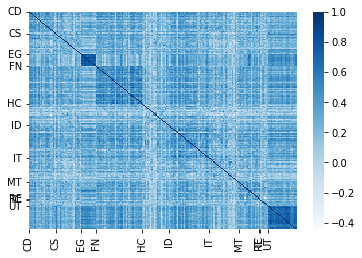

In [19]:
sns.heatmap(df2005.iloc[:,2:].corr(),cmap="Blues")
plt.xticks(ticks=list(pos.values()),labels=list(pos.keys()))
plt.yticks(ticks=list(pos.values()),labels=list(pos.keys()))
plt.show()

In [20]:
df2006 = data.query('date > datetime.date(2006,1,1) and date < datetime.date(2006,4,1)')

In [21]:
df2006

,Unnamed: 0,date,CD,CD.1,CD.2,CD.3,CD.4,CD.5,CD.6,CD.7,...,UT.11,UT.12,UT.13,UT.14,UT.15,UT.16,UT.17,UT.18,UT.19,UT.20
1509,1509,2006-01-03,53.700520,26.637375,27.326620,92.760002,26.189367,4.655121,21.462948,37.509590,...,23.865755,20.578169,25.720196,22.624853,22.536652,8.813828,12.011123,6.435943,13.086015,26.038788
1510,1510,2006-01-04,53.947365,26.929348,26.823011,91.900002,26.218987,4.890391,21.825407,37.461624,...,24.089949,20.632765,25.591270,22.624853,22.512369,8.771427,12.522704,6.435943,13.199427,26.317970
1511,1511,2006-01-05,54.031788,26.862282,26.557955,91.980003,26.278223,4.866258,21.301245,37.351925,...,24.123339,20.144041,25.373049,22.610331,22.350462,8.729024,12.404077,6.440895,12.955150,26.073702
1512,1512,2006-01-06,54.356602,27.039833,26.756746,91.010002,26.272295,4.930608,22.528011,37.242245,...,24.357090,20.344219,25.745005,22.678148,22.496178,8.856230,12.604267,6.485449,13.020581,26.178383
1513,1513,2006-01-09,55.207561,27.339703,27.048298,92.459999,26.272295,5.013052,22.823557,37.290234,...,24.476343,20.294809,25.621021,22.649086,22.544752,8.801711,12.389246,6.435943,13.103462,25.870134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,1566,2006-03-27,58.743259,27.170038,28.588783,98.849998,26.382481,5.081474,22.918354,36.512959,...,23.950480,18.521837,25.213278,21.674095,23.817535,7.905184,12.552361,5.971347,13.350412,24.957003
1567,1567,2006-03-28,58.462566,27.063507,28.588783,98.769997,26.149704,5.021006,22.762218,36.567894,...,23.743481,18.469362,25.338829,21.517101,23.678392,7.911243,12.470802,6.001407,13.156733,24.573130
1568,1568,2006-03-29,62.626827,27.353962,28.535591,98.919998,26.292963,5.101631,23.057756,36.602242,...,24.407827,18.456242,25.454357,21.678995,24.112188,7.947591,12.574607,6.121634,13.209555,24.854107
1569,1569,2006-03-30,59.696171,27.393476,28.183125,99.480003,26.143734,5.057286,22.868156,36.224548,...,24.066027,18.285719,25.268522,21.433712,24.202213,7.880955,12.544946,6.086568,13.033492,24.485332


In [22]:
for i in df2006.columns[2:]:
    df2006[i] = df2006[i].pct_change()
df2006.iloc[1:,:]

/tmp/ipykernel_47797/297547475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2006[i] = df2006[i].pct_change()


,Unnamed: 0,date,CD,CD.1,CD.2,CD.3,CD.4,CD.5,CD.6,CD.7,...,UT.11,UT.12,UT.13,UT.14,UT.15,UT.16,UT.17,UT.18,UT.19,UT.20
1510,1510,2006-01-04,0.004597,0.010961,-0.018429,-0.009271,0.001131,0.050540,0.016888,-0.001279,...,0.009394,0.002653,-0.005013,0.000000,-0.001077,-0.004811,0.042592,0.000000,0.008667,0.010722
1511,1511,2006-01-05,0.001565,-0.002490,-0.009882,0.000871,0.002259,-0.004935,-0.024016,-0.002928,...,0.001386,-0.023687,-0.008527,-0.000642,-0.007192,-0.004834,-0.009473,0.000769,-0.018507,-0.009281
1512,1512,2006-01-06,0.006012,0.006610,0.007485,-0.010546,-0.000226,0.013224,0.057591,-0.002936,...,0.009690,0.009937,0.014659,0.002999,0.006520,0.014573,0.016139,0.006917,0.005051,0.004015
1513,1513,2006-01-09,0.015655,0.011090,0.010896,0.015932,0.000000,0.016721,0.013119,0.001289,...,0.004896,-0.002429,-0.004816,-0.001282,0.002159,-0.006156,-0.017059,-0.007633,0.006365,-0.011775
1514,1514,2006-01-10,-0.022238,-0.003031,0.024008,0.000000,-0.005411,0.002808,-0.023211,-0.001103,...,-0.002144,0.008839,-0.000775,-0.002781,0.003231,0.001377,-0.006583,-0.003078,-0.004994,0.018210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,1566,2006-03-27,0.025992,0.000872,-0.003015,0.006004,-0.004729,-0.003163,-0.011544,-0.010054,...,-0.010738,-0.013277,-0.006531,-0.009417,0.000000,-0.020270,0.004152,-0.018930,-0.002631,-0.008091
1567,1567,2006-03-28,-0.004778,-0.003921,0.000000,-0.000809,-0.008823,-0.011900,-0.006813,0.001505,...,-0.008643,-0.002833,0.004980,-0.007243,-0.005842,0.000766,-0.006498,0.005034,-0.014507,-0.015381
1568,1568,2006-03-29,0.071230,0.010732,-0.001861,0.001519,0.005478,0.016058,0.012984,0.000939,...,0.027980,-0.000710,0.004559,0.007524,0.018320,0.004594,0.008324,0.020033,0.004015,0.011434
1569,1569,2006-03-30,-0.046796,0.001445,-0.012352,0.005661,-0.005676,-0.008692,-0.008223,-0.010319,...,-0.014004,-0.009239,-0.007301,-0.011314,0.003734,-0.008384,-0.002359,-0.005728,-0.013328,-0.014838


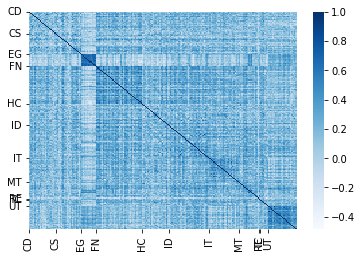

In [23]:
sns.heatmap(df2006.iloc[:,2:].corr(),cmap="Blues")
plt.xticks(ticks=list(pos.values()),labels=list(pos.keys()))
plt.yticks(ticks=list(pos.values()),labels=list(pos.keys()))
plt.show()

## Gaussian Distribution [FIGURE 3]

https://github.com/juanhenao21/exact_distributions_financial/blob/main/project/distribution_tests/exact_multivariate_ampl_distributions_python.ipynb

In [29]:
def gaussian_distribution(
    mean: float, variance: float, x_values: np.ndarray
) -> np.ndarray:
    """Compute the Gaussian distribution values.

    :param mean: mean of the Gaussian distribution.
    :param variance: variance of the Gaussian distribution.
    :param x_values: array of the values to compute the Gaussian
     distribution
    """

    return (1 / (2 * np.pi * variance) ** 0.5) * np.exp(
        -((x_values - mean) ** 2) / (2 * variance)
    )

## K-distribution [FIGURE 4]

![formula_13.png](formula_13.png)
![](rot_and_scale.png)

In [24]:
def k_distribution(returns, N, alpha):
    """Computes the one dimensional K-distribution with parameters
    N and alpha
    """
    first_part = (
        (((np.sqrt(2)) ** (1 - N)) / (np.sqrt(np.pi) * gamma(N / 2)))
        * (np.sqrt(N / alpha)) ** (N / 2 + 0.5)
        * (np.abs(returns)) ** (N / 2 - 0.5)
    )
    second_part = kv(N / 2 - 0.5, np.abs(returns) * np.sqrt(N / alpha))
    dist = first_part * second_part
    return dist

def rotate_and_scale(returns):
    """Rotates the returns in the eigenbasis of the covariance matrix
    and normalizes them to standard deviation 1. The returns array must
    have a TxK dimension, and K must be smaller than T.
    """
    cov = returns.cov()
    eig_val, eig_vec = np.linalg.eig(cov)
    rot, scale = eig_vec, np.diag(1 / np.sqrt(eig_val))
    trans = rot.dot(scale)
    return returns.dot(trans)

In [25]:
df = pd.read_csv("output_old/csv/sp500_stock_names.csv")
df = df.iloc[:,2:]
for i in df.columns:
    df[i] = df[i].pct_change()
df = df.iloc[1:,:]

In [26]:
def plot_rolled(df, delta_t):
    df_rolled  = df.rolling(window=delta_t, min_periods=1).sum()
    rr = np.arange(-8, 9, 0.11)
    bessel = k_distribution(rr, 3.2, 1)
    rot_returns = rotate_and_scale(df_rolled)
    print(rot_returns.shape, rot_returns[0].std())
    one_col = []
    for col in rot_returns.columns:
        one_col.append(rot_returns[col])
    agg = pd.concat(one_col, ignore_index=True)
    agg.plot(
        kind="density",
        figsize=(16, 9),
        logy=True,
        label="Aggregated returns",
        legend=True,
        lw=2,
    )
    plt.plot(rr, bessel, "o", label="K-distribution")
    plt.legend(fontsize=25)
    plt.xlim(-10, 10)
    plt.ylim(10 ** -4, 1)
    plt.xlabel(r"$\tilde{r}$", fontsize=20)
    plt.ylabel("PDF", fontsize=20)
    plt.grid(True)

(5639, 199) 0.9999999999999998


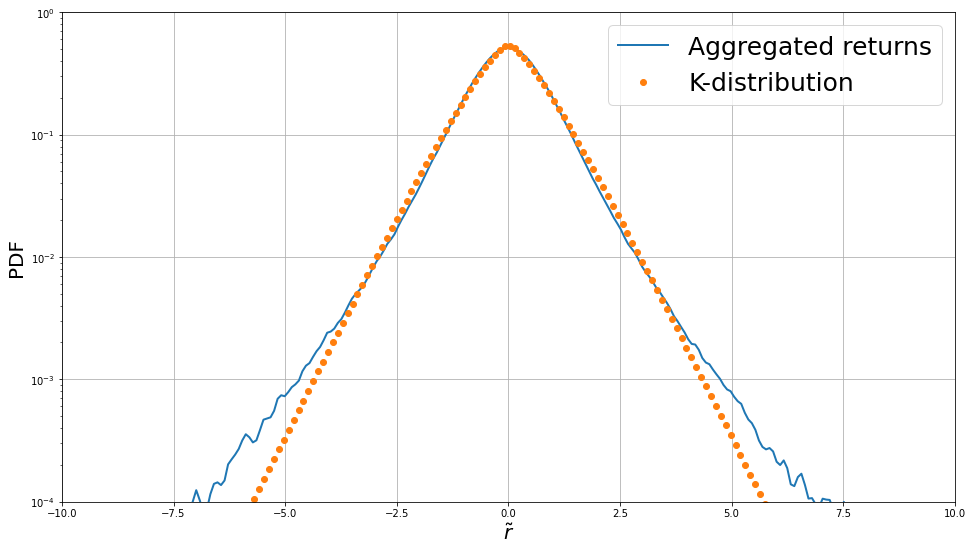

In [27]:
plot_rolled(df, delta_t = 1)

(5639, 199) 0.9999999999999994


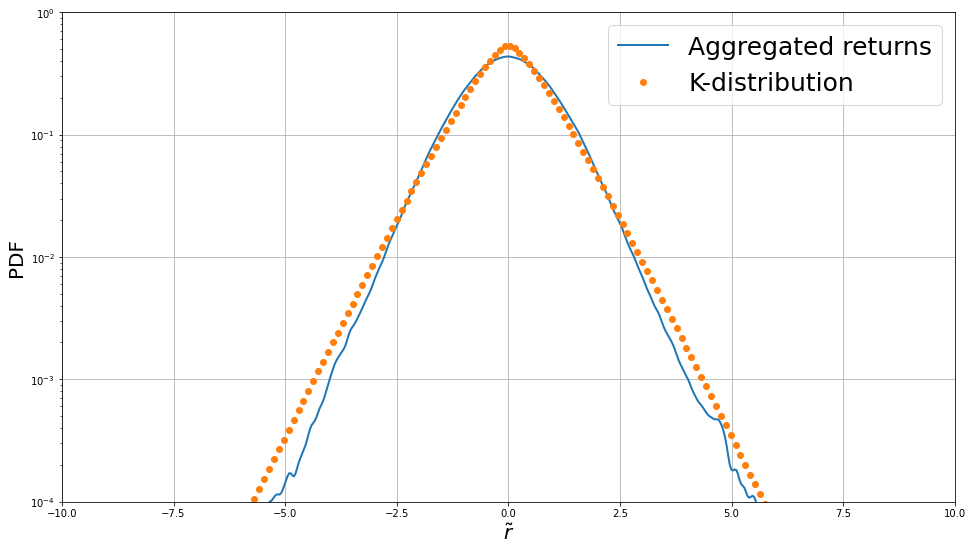

In [28]:
plot_rolled(df, delta_t = 20)

![](figure_4.png)